# OUTLIER

In [2]:
# Outlier adalah data extrem yg berbeda jauh dari umumnya data

In [37]:
from IPython.display import Image
import numpy as np
import pandas as pd
import seaborn as sns 
import statistics as st
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import math 

## Discussion:  
- What is boxplot and IQR? how to make boxplot with python  (grup 1)
- How to detect outliers with:  
    - Standar Deviation  (grup 2)
    - Boxplot and IQR Score  (grup 3)
    pakai data TotalPayBenefits


In [4]:
Image(url= 'https://miro.medium.com/max/700/1*NRlqiZGQdsIyAu0KzP7LaQ.png')

# Boxplots 

Boxplot are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

- median (Q2/50th Percentile): the middle value of the dataset.

- first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.

- third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.

- interquartile range (IQR): 25th to the 75th percentile.

- whiskers (shown in blue)

- outliers (shown as green circles)

- “maximum”: Q3 + 1.5*IQR

- “minimum”: Q1 -1.5*IQR

# IQR (interquartile range)

interquartile range (IQR): 25th to the 75th percentile.


In [5]:
sal = pd.read_csv('Salaries.csv')
sal.head(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN


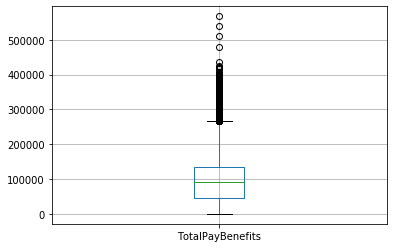

In [6]:
# boxplot dgn pandas
sal.boxplot('TotalPayBenefits')

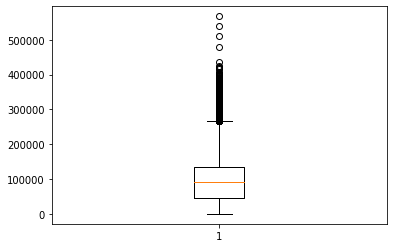

In [11]:
# boxplot dgn matplotlib
plt.boxplot(sal['TotalPayBenefits'])
plt.show()

In [12]:
x=[1,2,3,4,5,6,7,8,9,100]
st.mean(x)


14.5

In [13]:
st.stdev(x)

30.152390728873666

In [14]:
random_data = np.random.randn(500) *20 + 20

In [15]:
# Mencari Outliers dgn Standard Deviasi

def find_anomalies(data):
    anomalies=[]
    random_data_std = np.std(data)
    random_data_mean = np.mean(data)
    anomaly_gate = random_data_std * 2

    lower_limit = random_data_mean - anomaly_gate
    upper_limit = random_data_mean + anomaly_gate
    print(f'batas bawah {lower_limit}')
    print(f'batas atas {upper_limit}')

    for outlier in data:
        if outlier>upper_limit or outlier<lower_limit:
            anomalies.append(outlier)
    return anomalies

In [16]:
len(find_anomalies(random_data))

batas bawah -22.11259278857617
batas atas 61.587636286403296


25

In [17]:
find_anomalies(random_data)

batas bawah -22.11259278857617
batas atas 61.587636286403296


[-36.56717895756576,
 -22.96204793264416,
 -24.192489722990523,
 70.14325681382186,
 77.72556774693402,
 -28.62607689684984,
 -28.36740256808359,
 -24.453252447079294,
 71.97895780819792,
 -24.204839073501788,
 64.90034579488831,
 86.38928104321833,
 -29.473697853361642,
 72.35979591447767,
 77.1663344733469,
 -38.64174636786208,
 -31.118555883039924,
 67.47205702014753,
 -46.358782262527285,
 80.0274837029358,
 80.2904336739578,
 -37.86866275147659,
 71.13616655179956,
 -27.748836252449692,
 -34.44318619221282]

# TAKE HOME EXCERCISE

Buat function yg bisa mendeteksi outliers menggunakan teori IQR 

IQR = Q3-Q1 

Outliers = kurang dari (Q1 - 1.5* IQR) dan lebih dari (Q3 + 1.5*IQR)

Buat boxplot untuk Weight dan Salary, apakah ada outliers?

Gunakan fungsi yang kalian buat untuk mencari data mana saja yang merupakan outliers.


In [18]:
nba = pd.read_csv('nba.csv').dropna()
nba.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
6,Jordan Mickey,Boston Celtics,55.0,PF,21.0,6-8,235.0,LSU,1170960.0
7,Kelly Olynyk,Boston Celtics,41.0,C,25.0,7-0,238.0,Gonzaga,2165160.0


In [19]:
np.percentile(nba['Salary'], 25, interpolation='midpoint')

1000000.0

In [20]:
np.quantile(nba['Salary'].dropna(), .25)

1000000.0

In [21]:
data = nba['Salary'] 
  
# First quartile (Q1) 
Q1 = np.percentile(data, 25, interpolation = 'midpoint') 
  
# Third quartile (Q3) 
Q3 = np.percentile(data, 75, interpolation = 'midpoint') 
  
# Interquaritle range (IQR) 
IQR = Q3 - Q1 

In [22]:
print(Q1)
print(Q3)
print(IQR)

1000000.0
6189354.5
5189354.5


# Membuat Fungsi untuk Mencari Outliers

In [23]:
def find_outliers(x):
    q1 = np.percentile(x,25, interpolation='midpoint')
    q3 = np.percentile(x,75, interpolation='midpoint')
    
    # print(f'Q1 = {q1}')
    # print(f'Q3 = {q3}')

    IQR = q3 - q1

    # print(f'IQR : {IQR}')

    upper_limit = q3 + (1.5*IQR)
    lower_limit = q1 - (1.5*IQR)

    # print(f'upper whisker: {upper_limit}')
    # print(f'lower whisker: {lower_limit}')

    outliers = []
    for value in x:
        if value > upper_limit or value < lower_limit:
            outliers.append(value)
    
    return outliers

def upper_whisker(x):
    q1 = np.percentile(x,25, interpolation='midpoint')
    q3 = np.percentile(x,75, interpolation='midpoint')
    IQR = q3 - q1
    upper_limit = q3 + (1.5*IQR)
    
    return upper_limit

def lower_whisker(x):
    q1 = np.percentile(x,25, interpolation='midpoint')
    q3 = np.percentile(x,75, interpolation='midpoint')
    IQR = q3 - q1
    lower_limit = q1 - (1.5*IQR)

    return lower_limit

In [24]:
len(find_outliers(nba['Weight']))

0

In [25]:
find_outliers(nba['Weight'])

[]

In [26]:
len(find_outliers(nba['Salary']))

32

In [27]:
find_outliers(nba['Salary'])

[19689000.0,
 22875000.0,
 14260870.0,
 15501000.0,
 18907726.0,
 19689000.0,
 21468695.0,
 15592217.0,
 15851950.0,
 16407500.0,
 20093064.0,
 16407501.0,
 19689000.0,
 14260870.0,
 16000000.0,
 17120106.0,
 14700000.0,
 16407500.0,
 16407500.0,
 15361500.0,
 15756438.0,
 15514031.0,
 19689000.0,
 16407500.0,
 18671659.0,
 22192730.0,
 20000000.0,
 15851950.0,
 20158622.0,
 16407500.0,
 16744218.0,
 15409570.0]

# Menampilkan Boxplot

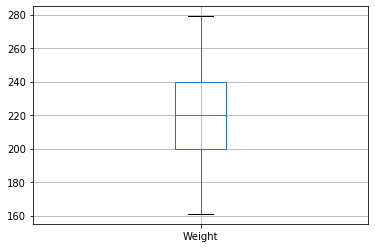

In [28]:
# boxplot dgn pandas
nba.boxplot('Weight')
plt.show()

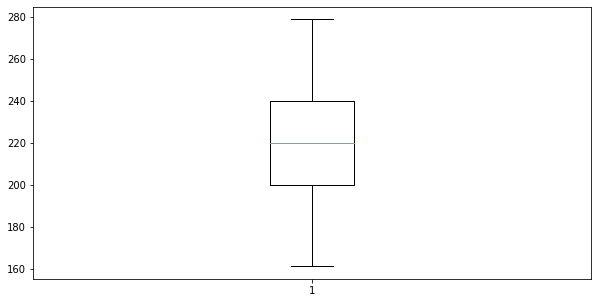

In [48]:
fig = plt.figure(figsize=(10,5))
plt.boxplot(nba['Weight'])
plt.show()

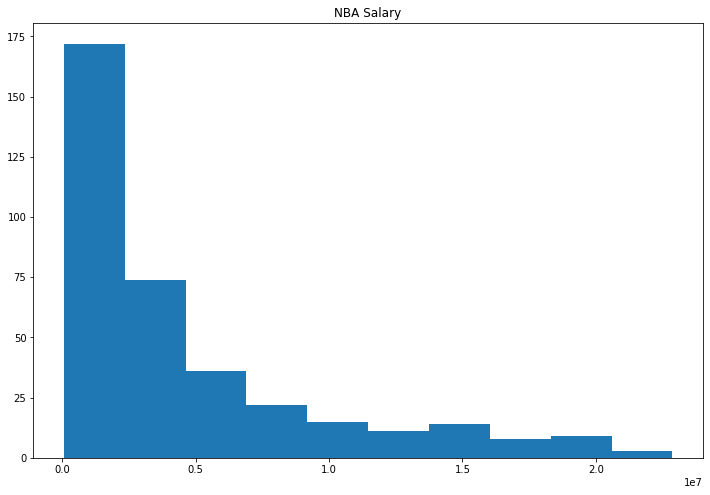

In [64]:
plt.figure(figsize=(12,8))
plt.hist(nba['Salary'])
# plt.legend(loc=0)
plt.title('NBA Salary', )
plt.show()

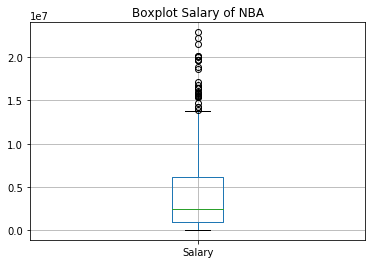

In [30]:
# boxplot dgn pandas
nba.boxplot('Salary')
plt.title('Boxplot Salary of NBA')
plt.show()

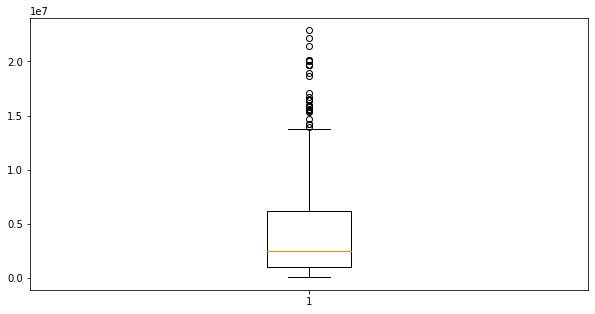

In [53]:
# boxplot dgn matplotlib
fig = plt.figure(figsize=(10,5))
plt.boxplot(nba['Salary'])
plt.show()

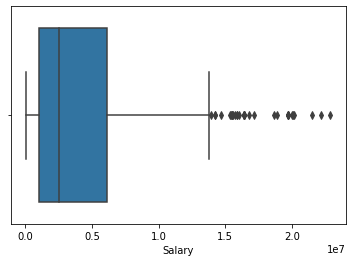

In [54]:
# boxplot dgn seaborn
sns.boxplot(nba['Salary'])
plt.show()

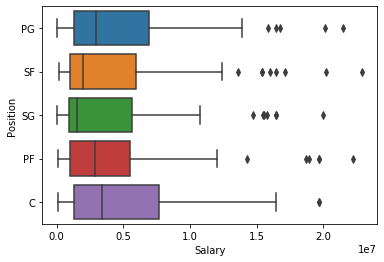

In [58]:
sns.boxplot(x=nba['Salary'], y=nba['Position'])
plt.show()

# Menanpilkan data outliers

In [32]:
print(upper_whisker(nba['Weight']))
print(lower_whisker(nba['Weight']))

300.0
140.0


In [33]:
nba.loc[(nba['Weight']>upper_whisker(nba['Weight'])) | (nba['Weight']<lower_whisker(nba['Weight']))]

,Name,Team,Number,Position,Age,Height,Weight,College,Salary


In [34]:
print(upper_whisker(nba['Salary']))
print(lower_whisker(nba['Salary']))

13973386.25
-6784031.75


In [45]:
nba.loc[(nba['Salary']>upper_whisker(nba['Salary'])) | (nba['Salary']<lower_whisker(nba['Salary']))].sort_values(ascending=False, by='Salary')

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
33,Carmelo Anthony,New York Knicks,7.0,SF,32.0,6-8,240.0,Syracuse,22875000.0
339,Chris Bosh,Miami Heat,1.0,PF,32.0,6-11,235.0,Georgia Tech,22192730.0
100,Chris Paul,Los Angeles Clippers,3.0,PG,31.0,6-0,175.0,Wake Forest,21468695.0
414,Kevin Durant,Oklahoma City Thunder,35.0,SF,27.0,6-9,240.0,Texas,20158622.0
164,Derrick Rose,Chicago Bulls,1.0,PG,27.0,6-3,190.0,Memphis,20093064.0
349,Dwyane Wade,Miami Heat,3.0,SG,34.0,6-4,220.0,Marquette,20000000.0
294,LaMarcus Aldridge,San Antonio Spurs,12.0,PF,30.0,6-11,240.0,Texas,19689000.0
174,Kevin Love,Cleveland Cavaliers,0.0,PF,27.0,6-10,251.0,UCLA,19689000.0
23,Brook Lopez,Brooklyn Nets,11.0,C,28.0,7-0,275.0,Stanford,19689000.0
98,DeAndre Jordan,Los Angeles Clippers,6.0,C,27.0,6-11,265.0,Texas A&M,19689000.0
